<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet
## Quick Start

Source: https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
!pip install -q geopandas

In [0]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files
from fbprophet import Prophet

In [0]:
!unzip ccd_2019.zip

Archive:  ccd_2019.zip
  inflating: bdmep_meta.csv          
  inflating: __MACOSX/._bdmep_meta.csv  
  inflating: inmetr.csv              
  inflating: __MACOSX/._inmetr.csv   


In [0]:
stations_meta = pd.read_csv("bdmep_meta.csv")

In [0]:
stations_meta.shape

(389, 11)

In [0]:
stations_meta.columns

Index(['id', 'lon', 'lat', 'alt', 'name', 'state', 'uf', 'time_zone',
       'offset_utc', 'time_zone.1', 'offset_utc.1'],
      dtype='object')

In [0]:
stations_meta.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


In [0]:
stations_per_uf = stations_meta.groupby('uf').size().reset_index(name='stations_per_uf')
stations_per_uf_sorted_desc = stations_per_uf.sort_values('stations_per_uf', ascending=False)
stations_per_uf_sorted_desc.head()

,uf,stations_per_uf
10,MG,62
25,SP,35
18,RJ,33
22,RS,30
4,BA,28


In [0]:
inmetr = pd.read_csv("inmetr.csv")

In [0]:
inmetr.shape

(14528638, 17)

In [0]:
inmetr.columns

Index(['date', 'id', 'prec', 'tair', 'tw', 'tmax', 'tmin', 'urmax', 'patm',
       'pnmm', 'wd', 'wsmax', 'n', 'cc', 'evap', 'ur', 'ws'],
      dtype='object')

In [0]:
inmetr.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [0]:
df = pd.merge(stations_meta, inmetr, on='id')
df

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 00:00:00,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 12:00:00,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
2,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 18:00:00,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN
3,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-05 00:00:00,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.00,2.4,88.25,NaN
4,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-05 12:00:00,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14528633,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-29 12:00:00,5.0,21.5,NaN,NaN,20.9,86.0,945.2,1011.5,5.0,1.02888,NaN,10.00,NaN,NaN,NaN
14528634,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-30 00:00:00,NaN,22.3,NaN,30.2,NaN,97.0,945.0,1011.9,0.0,0.00000,9.0,7.50,NaN,NaN,0.0
14528635,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-30 12:00:00,1.7,26.0,NaN,NaN,21.2,76.0,944.7,1011.2,0.0,0.00000,NaN,6.25,NaN,NaN,NaN
14528636,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-31 00:00:00,NaN,23.2,NaN,30.0,NaN,90.0,945.2,1011.7,0.0,0.00000,0.0,10.00,NaN,NaN,0.0


In [0]:
df_by_station = df.groupby(['lon', 'lat', 'name'])
df_by_station_count_des = df_by_station.size().reset_index(name='num_of_measurements_by_station').sort_values('num_of_measurements_by_station', ascending=False)
df_by_station_count_des

,lon,lat,name,num_of_measurements_by_station
23,-59.950000,-3.116667,Manaus,63486
125,-49.266667,-8.266667,Conceição do Araguaia,63268
386,-34.950000,-8.050000,Recife (Curado),63166
155,-47.933333,-15.783333,Brasília,62674
126,-49.250000,-16.666667,Goiânia,62220
...,...,...,...,...
25,-58.283333,-13.033333,Utiariti,5479
5,-68.733333,-11.016667,Brasiléia,4877
288,-42.250000,-5.200000,Alto Longa (Piloto do Longa),3879
264,-43.200000,-12.683333,Paratinga,3654


In [0]:
fig = px.scatter_geo(data_frame=df_by_station_count_des.head(2), scope='south america',lat='lat',lon='lon',
                     size='num_of_measurements_by_station', color='name')
fig.update_layout(
        title_text = '317')
fig.show()

In [0]:
df_by_uf = df.groupby('uf')
df_by_uf.size().reset_index(name='num_of_measurements_by_uf')

,uf,num_of_measurements_by_uf
0,AC,153551
1,AL,166337
2,AM,797099
3,AP,92709
4,BA,1036673
5,CE,535529
6,DF,62674
7,ES,334691
8,GO,544397
9,MA,615391


In [0]:
df_by_uf.get_group('RN')['name'].drop_duplicates()

11026240          Apodí
11066911    Ceará Mirim
11103630        Cruzeta
11158018       Florânia
11201031          Macau
11246115        Mossoró
11272236          Natal
Name: name, dtype: object

In [0]:
nan_prec = 100.0 * ((len(df) - df['prec'].count()) / len(df))
nan_tair = 100.0 * ((len(df) - df['tair'].count()) / len(df))
nan_tw = 100.0 * ((len(df) - df['tw'].count()) / len(df))
nan_tmax = 100.0 * ((len(df) - df['tmax'].count()) / len(df))
nan_tmin = 100.0 * ((len(df) - df['tmin'].count()) / len(df))
nan_urmax = 100.0 * ((len(df) - df['urmax'].count()) / len(df))
nan_patm = 100.0 * ((len(df) - df['patm'].count()) / len(df))
nan_pnmm = 100.0 * ((len(df) - df['pnmm'].count()) / len(df))
nan_wd = 100.0 * ((len(df) - df['wd'].count()) / len(df))
nan_wsmax = 100.0 * ((len(df) - df['wsmax'].count()) / len(df))
nan_n = 100.0 * ((len(df) - df['n'].count()) / len(df))
nan_cc = 100.0 * ((len(df) - df['cc'].count()) / len(df))
nan_evap = 100.0 * ((len(df) - df['evap'].count()) / len(df))
nan_ur = 100.0 * ((len(df) - df['ur'].count()) / len(df))
nan_ws = 100.0 * ((len(df) - df['ws'].count()) / len(df))

print("Precipitação (%): ", nan_prec.round())
print("Temperatura do Ar (%): ", nan_tair.round())
print("Temperatura de Bulbo Úmido (%): ", nan_tw.round())
print("Temperatura Máxima do Ar (%): ", nan_tmax.round())
print("Temperatura Mínima do Ar (%): ", nan_tmin.round())
print("Umidade Relativa Máxima (%): ", nan_urmax.round())
print("Pressão Atmosférica (%): ", nan_patm.round())
print("Pressão Atmosférica Média ao Nível do Mar (%): ", nan_pnmm.round())
print("Direção do Vento (%): ", nan_wd.round())
print("Rajadas de Vento (%): ", nan_wsmax.round())
print("Horas de Sol (%): ", nan_n.round())
print("Cobertura de Nuvens (%): ", nan_cc.round())
print("Evaporação (%): ", nan_evap.round())
print("Umidade Relativa (%): ", nan_ur.round())
print("Velocidade do Vento (%): ", nan_ws.round())

Precipitação (%):  67.0
Temperatura do Ar (%):  6.0
Temperatura de Bulbo Úmido (%):  9.0
Temperatura Máxima do Ar (%):  68.0
Temperatura Mínima do Ar (%):  67.0
Umidade Relativa Máxima (%):  9.0
Pressão Atmosférica (%):  27.0
Pressão Atmosférica Média ao Nível do Mar (%):  76.0
Direção do Vento (%):  13.0
Rajadas de Vento (%):  11.0
Horas de Sol (%):  73.0
Cobertura de Nuvens (%):  6.0
Evaporação (%):  70.0
Umidade Relativa (%):  70.0
Velocidade do Vento (%):  70.0


In [0]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

gdf = gp.GeoDataFrame(
    df, geometry=gp.points_from_xy(df.Longitude, df.Latitude))

print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


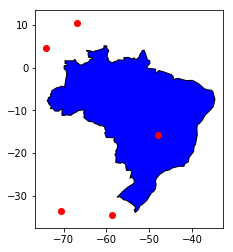

In [0]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# We restrict to Brazil.
ax = world[world.name == 'Brazil'].plot(
    color='blue', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [0]:

df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [0]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.499643,8.949227
3266,2017-01-16,8.524244,7.821072,9.282460
3267,2017-01-17,8.311615,7.613132,9.065844
3268,2017-01-18,8.144232,7.391259,8.848926
3269,2017-01-19,8.156091,7.410593,8.833522


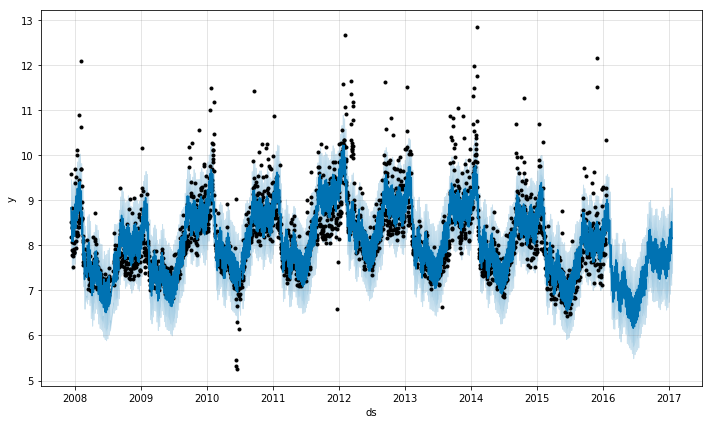

In [0]:
fig1 = m.plot(forecast)

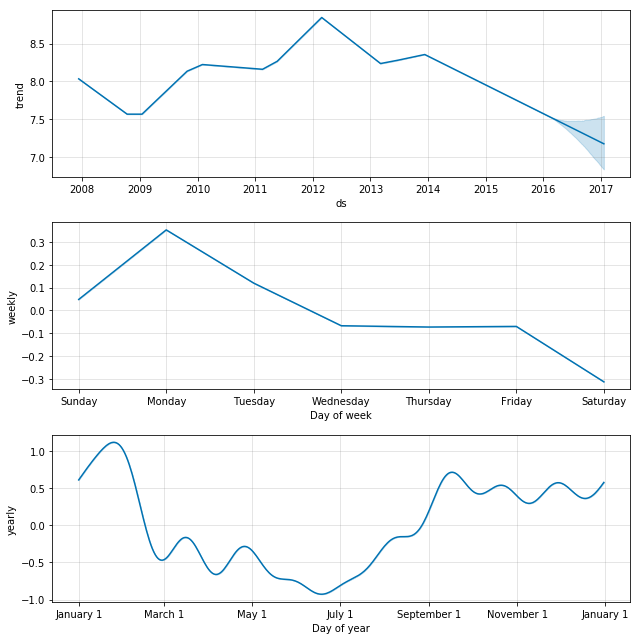

In [0]:
fig2 = m.plot_components(forecast)